# K-Means Clustering - Handwriting Recognition 
This project uses k-means clustering to cluster images of handwritten numbers. This is how post offices, ATMs, etc also do handwriting recognition! 

NOTE: This project is based on Codecademy's [Handwriting Recognition project](https://www.codecademy.com/journeys/data-scientist-ml/paths/dsmlcj-22-machine-learning-i/tracks/dsmlcj-22-unsupervised-learning-algorithms-i/modules/mle-k-means-clustering-d0069e1f-bb75-469a-808e-68ff83284e40-155dbbbb-2ba8-42aa-90d2-a95b5983d2ae/projects/clustering). 


## Dataset
The dataset comes from `sklearn`. 

## Setup

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

## Load in and look at datasets

In [2]:
digits = datasets.load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [3]:
print("Shape of the features:", digits.data.shape)

print("One digit looks like:\n", digits.data[0])

Shape of the features: (1797, 64)
One digit looks like:
 [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [4]:
print(digits.target)

print(f"The target of the above digit (represented as the 64-len map) is {digits.target[0]}.")

[0 1 2 ... 8 9 8]
The target of the above digit (represented as the 64-len map) is 0.


Each image is an 8x8 map of pixel values, with a range of 0-16 representing a pixel darkness; this can be plotted in greyscale to visualize the digit represented by each map. The first 64 digits are shown below. 

This map is in `digits.data` (features), while `digits.target` contains the labels. 

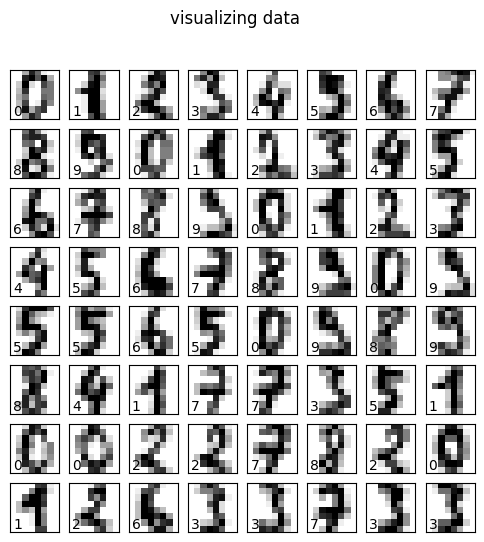

In [5]:
# plot the first 64 images
fig = plt.figure(figsize=(6, 6))
fig.suptitle("visualizing data")

for i in range(64):
    # Initialize the subplots: add a subplot in the grid of 8 by 8, at the i+1-th position
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    # Display an image at the i-th position
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # Label the image with the target value
    ax.text(0, 7, str(digits.target[i]))
plt.show()

## Fitting and evaluating K-means model
A k-means model can now be fit. As there are 10 possible digits (0-9), the model will be initialized with 10 clusters.
The evaluation will be done via silhouette score. 

In [6]:
# create and fit K-means model
k = 10 # number of possible digits
model = KMeans(n_clusters=k, random_state=42)
model.fit(digits.data)

# evaluate with the silhouette score
score = silhouette_score(digits.data, digits.target)
print(f"The silhouette score is {score:.3f}.")

The silhouette score is 0.163.


### Visualize model centroids

The model centroids can be used to map onto a similar 8x8 grid, which has the representations of each of the clusters:
* id 0 = digit 7
* id 1 = digit 5
* id 2 = digit 6
* id 3 = digit 2
* id 4 = digit 4
* id 5 = digit 0
* id 6 = digit 3
* id 7 = digit 1
* id 8 = digit 8
* id 9 = digit 9

Some digits are more clear (e.g "digits" 6, 4, 9) than others (e.g. "digits 1, 2, and even 7 look similar).

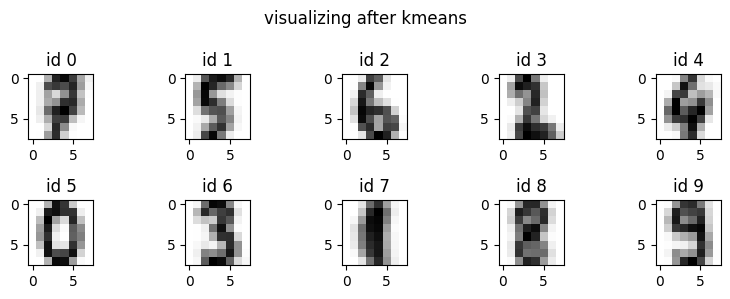

In [7]:
# visualizing centoids as digits
fig = plt.figure(figsize=(8, 3))
fig.suptitle("visualizing after kmeans")

for i in range(10):
  # Initialize subplots in a grid of 2X5, at i+1th position
  ax = fig.add_subplot(2, 5, 1 + i)
  ax.set_title(f"id {i}")
  # Display images
  ax.imshow(model.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)

plt.tight_layout()
plt.show()


### Training and Testing set
The initial dataset will be split into a training and testing set, so that we can see if the model can use the trained clusters to correctly guess new digits. 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=42)

model2 = KMeans(n_clusters=k, random_state=42)
model2.fit(X_train)

# evaluate with the silhouette score
train = silhouette_score(X_train, y_train)
test = silhouette_score(X_test, y_test)
print(f"The train silhouette score on the second model is {train:.3f}.")
print(f"The test silhouette score on the second model is {test:.3f}.")

The train silhouette score on the second model is 0.163.
The test silhouette score on the second model is 0.160.


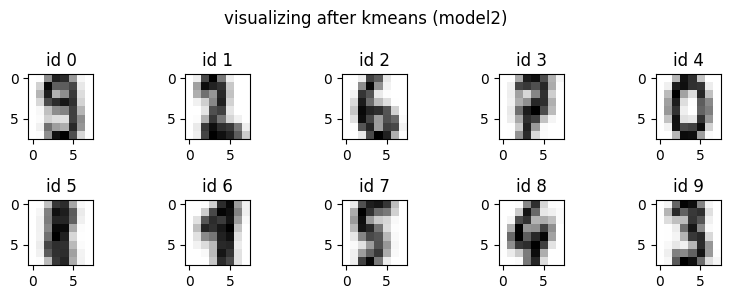

In [9]:
# visualizing centoids as digits
fig = plt.figure(figsize=(8, 3))
fig.suptitle("visualizing after kmeans (model2)")

for i in range(10):
  # Initialize subplots in a grid of 2X5, at i+1th position
  ax = fig.add_subplot(2, 5, 1 + i)
  ax.set_title(f"id {i}")
  # Display images
  ax.imshow(model2.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)

plt.tight_layout()
plt.show()

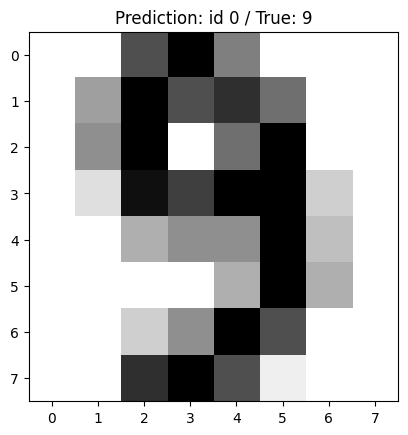

In [10]:
ind = 1
pred = model2.predict([X_test[ind]])

plt.imshow(X_test[ind].reshape((8, 8)), cmap=plt.cm.binary, interpolation='nearest')
plt.title(f"Prediction: id {pred[0]} / True: {y_test[ind]}")
plt.show()